In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
digits = load_digits()
X = digits.data
y = digits.target

In [4]:
print("Dataset Shape: ", X.shape)

Dataset Shape:  (1797, 64)


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
components_list = [2, 10, 30, 50]
variance_results = []

for n in components_list:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_scaled)
    variance = np.sum(pca.explained_variance_ratio_)
    variance_results.append(variance)
    print(f"Components: {n} → Explained Variance: {variance:.4f}")


Components: 2 → Explained Variance: 0.2159
Components: 10 → Explained Variance: 0.5887
Components: 30 → Explained Variance: 0.8932
Components: 50 → Explained Variance: 0.9828


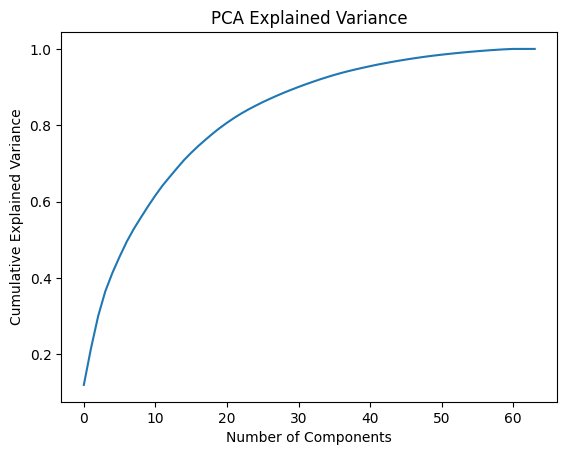

In [7]:
pca_full = PCA()
pca_full.fit(X_scaled)

cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.plot(cumulative_variance)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.show()


In [8]:
pca = PCA(n_components=30)
X_reduced = pca.fit_transform(X_scaled)

print("Reduced shape:", X_reduced.shape)


Reduced shape: (1797, 30)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)

In [10]:
model_original = LogisticRegression(max_iter=10000)
model_original.fit(X_train, y_train)
pred_original = model_original.predict(X_test)
acc_original = accuracy_score(y_test, pred_original)

In [12]:
model_pca = LogisticRegression(max_iter=10000)
model_pca.fit(Xr_train, yr_train)
pred_pca = model_pca.predict(Xr_test)
acc_pca = accuracy_score(yr_test, pred_pca)


In [13]:
print("Accuracy (Original Data):", acc_original)
print("Accuracy (PCA Reduced Data):", acc_pca)

Accuracy (Original Data): 0.9722222222222222
Accuracy (PCA Reduced Data): 0.9611111111111111


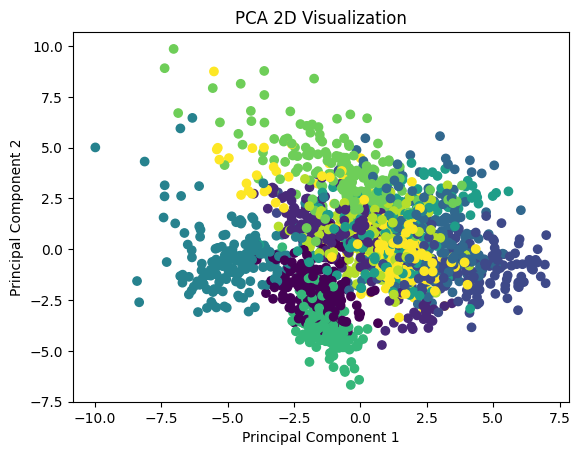

In [14]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA 2D Visualization")
plt.show()
